## Exploratory Data Analisys
Izquierda Diario

### Load tokens

In [1]:
import pandas as pd
import pickle

In [2]:
token_df = pd.read_pickle('tokens/topic_tokens_izq.pkl')

In [3]:
token_df

topics  abajo  abarca  abastecimiento  abc  abierta  abiertamente  \
doc1   inflation      0       0               1    0        0             0   
doc2   inflation      0       0               0    0        0             0   
doc3   inflation      0       0               0    0        0             0   
doc4   inflation      0       0               0    1        0             0   
doc5   inflation      0       0               0    0        0             0   
...          ...    ...     ...             ...  ...      ...           ...   
doc61   exchange      0       0               0    0        0             0   
doc62   exchange      0       0               0    0        0             0   
doc63   exchange      0       0               0    0        0             0   
doc64   exchange      0       0               0    0        0             0   
doc65   exchange      0       0               0    0        0             0   

       abierto  abiertos  abre  ...  yerbalas  yield  yogurt  ypf  yunta  \
doc1         0         0     0  ...         0      0       0    0      0   
doc2         0         0     0  ...         0      0       0    0      0   
doc3         0         0     0  ...         0      0       0    0      0   
doc4         0         0     0  ...         0      0       0    0      0   
doc5         0         0     0  ...         0      0       0    0      0   
...        ...       ...   ...  ...       ...    ...     ...  ...    ...   
doc61        0         0     0  ...         0      0       0    0      0   
doc62        0         0     0  ...         0      0       0    0      0   
doc63        0         0     0  ...         0      0       0    0      0   
doc64        0         0     0  ...         0      0       0    0      0   
doc65        0         0     0  ...         0      0       0    0      0   

       zarpado  zona  zonaprop  zonopropen  zorzon  
doc1         0     0         0           0       0  
doc2         0     0         0           0       0  
doc3         0     0         0           0       0  
doc4         0     0         0           0       0  
doc5         0     0         2           1       0  
...        ...   ...       ...         ...     ...  
doc61        0     0         0           0       0  
doc62        0     0         0           0       0  
doc63        0     0         0           0       0  
doc64        0     0         0           0       0  
doc65        1     0         0           0       0  

[65 rows x 3411 columns]

Get docs by topics

### Count words in/between doc(s)

#### Inflation topics

In [4]:
inflation = token_df[token_df.topics == 'inflation'].drop('topics', axis=1)

In [5]:
inflation.shape

(39, 3410)

In [6]:
def count_words(df):
    top_words = {}
    for column in df.transpose().columns:
        top = df.transpose()[column].sort_values(ascending=False).head(30)
        top_words[column] = list(zip(top.index, top.values))
    return top_words

In [7]:
top_words = count_words(inflation)

In [8]:
for doc, words in top_words.items():
    print(f'{doc}\n{list((word, num) for word, num in words)}\n-------------')

doc1
[('construccion', 7), ('precios', 5), ('aumento', 4), ('ano', 4), ('inflacion', 3), ('mayoristas', 3), ('solo', 3), ('suba', 3), ('costo', 3), ('fernandez', 2), ('incremento', 2), ('materiales', 2), ('sector', 2), ('noviembre', 2), ('dificil', 2), ('mientras', 2), ('productos', 2), ('obra', 1), ('vehiculos', 1), ('dia', 1), ('bebidas', 1), ('leer', 1), ('alguien', 1), ('problemate', 1), ('mejor', 1), ('solucion', 1), ('alimentos', 1), ('detiene', 1), ('empresa', 1), ('basicos', 1)]
-------------
doc2
[('ano', 5), ('noviembre', 4), ('inflacion', 4), ('precios', 3), ('mayor', 3), ('mas', 2), ('cultura', 2), ('division', 2), ('subieron', 2), ('tambien', 2), ('bebidas', 2), ('frutas', 2), ('octubre', 2), ('alimentos', 2), ('mientras', 2), ('alcoholicas', 2), ('organismo', 2), ('carnes', 2), ('recreacion', 2), ('aumento', 2), ('informo', 2), ('subas', 2), ('tendran', 1), ('aquella', 1), ('macri', 1), ('comparacion', 1), ('mantecaen', 1), ('mantenimiento', 1), ('fuertes', 1), ('comunica

#### Plot

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [10]:
words_graph = [dict(top_words[key][:10]) for key in top_words]

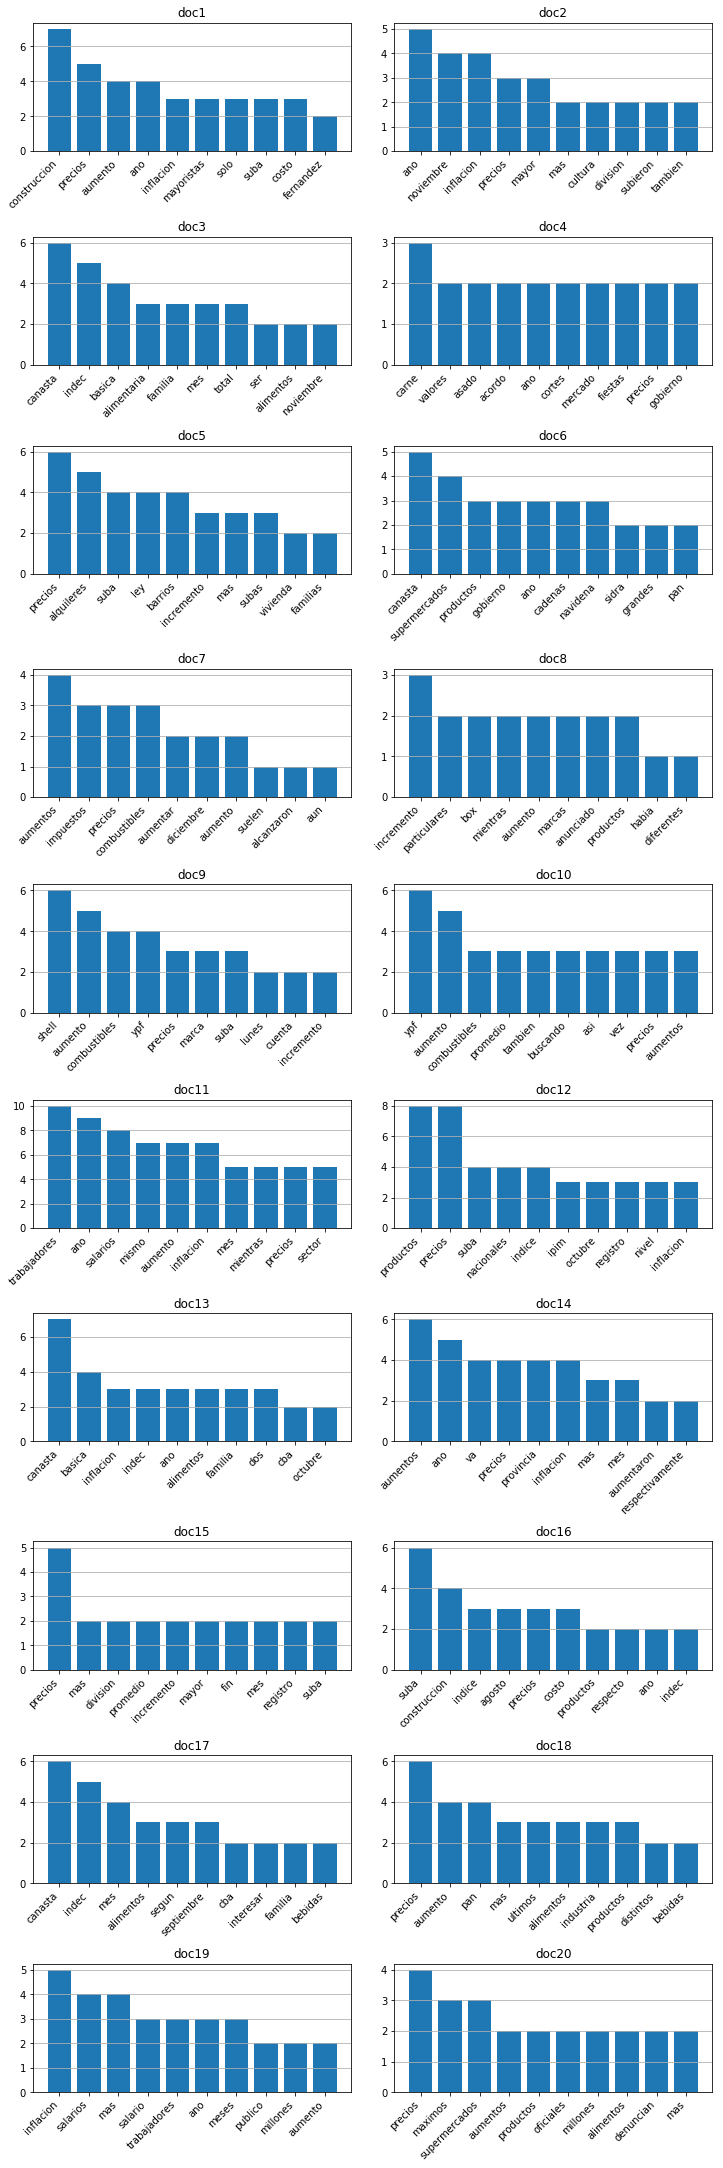

In [11]:
fig, axes = plt.subplots(nrows=10, ncols=2, constrained_layout=True, figsize=(10,30))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right')
    ax.set_title(list(top_words.keys())[index])

plt.xticks(rotation=45)
plt.show()

Check how many times the words are repeated amid the documents of the same topic

In [12]:
from collections import Counter

In [13]:
words = []
for docs, w_counts in top_words.items():
    for word in list(word for word, num in w_counts):
        words.append(word)        

In [14]:
for word_count in Counter(words).most_common()[:50]:
    print(word_count)

('precios', 23)
('aumento', 21)
('ano', 21)
('mas', 21)
('inflacion', 19)
('suba', 19)
('alimentos', 17)
('mes', 17)
('incremento', 13)
('bebidas', 13)
('trabajadores', 13)
('productos', 12)
('indec', 11)
('salarios', 11)
('gobierno', 10)
('canasta', 9)
('aumentos', 9)
('promedio', 9)
('paritarias', 9)
('mientras', 8)
('tambien', 8)
('basica', 8)
('octubre', 7)
('familia', 7)
('segun', 7)
('ultimos', 7)
('mayor', 6)
('ingresos', 6)
('millones', 6)
('salario', 6)
('indice', 6)
('registro', 6)
('costo', 5)
('sector', 5)
('noviembre', 5)
('subas', 5)
('cba', 5)
('dos', 5)
('precio', 5)
('mismo', 5)
('agosto', 5)
('nivel', 5)
('cuarentena', 5)
('dia', 4)
('organismo', 4)
('total', 4)
('incluye', 4)
('cbt', 4)
('interesar', 4)
('crisis', 4)


#### Currency exchange news

In [15]:
exchange = token_df[token_df.topics == 'exchange'].drop('topics', axis=1)
exchange.shape

(26, 3410)

In [16]:
top_words = count_words(exchange)

In [17]:
for doc, words in top_words.items():
    print(f'{doc}\n{list((word, num) for word, num in words)}\n-------------')

doc40
[('dias', 5), ('local', 4), ('dolar', 4), ('cnv', 4), ('moneda', 3), ('bolsa', 3), ('mep', 3), ('bonos', 3), ('liquidacion', 2), ('habiles', 2), ('carteras', 2), ('propias', 2), ('mas', 2), ('disminuyo', 2), ('permanencia', 2), ('plazo', 2), ('venden', 2), ('humanas', 2), ('pesos', 2), ('juridicas', 2), ('transferencia', 2), ('parking', 2), ('alycs', 2), ('tres', 2), ('extranjera', 2), ('negociable', 2), ('dispuso', 2), ('medidas', 2), ('personas', 2), ('dos', 2)]
-------------
doc41
[('dolar', 6), ('mientras', 3), ('dolares', 3), ('fmi', 2), ('mep', 2), ('oficial', 2), ('nuevas', 2), ('ccl', 2), ('clave', 1), ('subas', 1), ('trepo', 1), ('relativa', 1), ('rebaja', 1), ('expresan', 1), ('vez', 1), ('venderse', 1), ('relacionada', 1), ('marco', 1), ('costa', 1), ('solidario', 1), ('niveles', 1), ('conducen', 1), ('desgaste', 1), ('mas', 1), ('liquidar', 1), ('condensa', 1), ('negociar', 1), ('pulseada', 1), ('liqui', 1), ('soja', 1)]
-------------
doc42
[('dolar', 5), ('bonos', 3)

#### Plot

In [18]:
words_graph = [dict(top_words[key][:10]) for key in top_words]

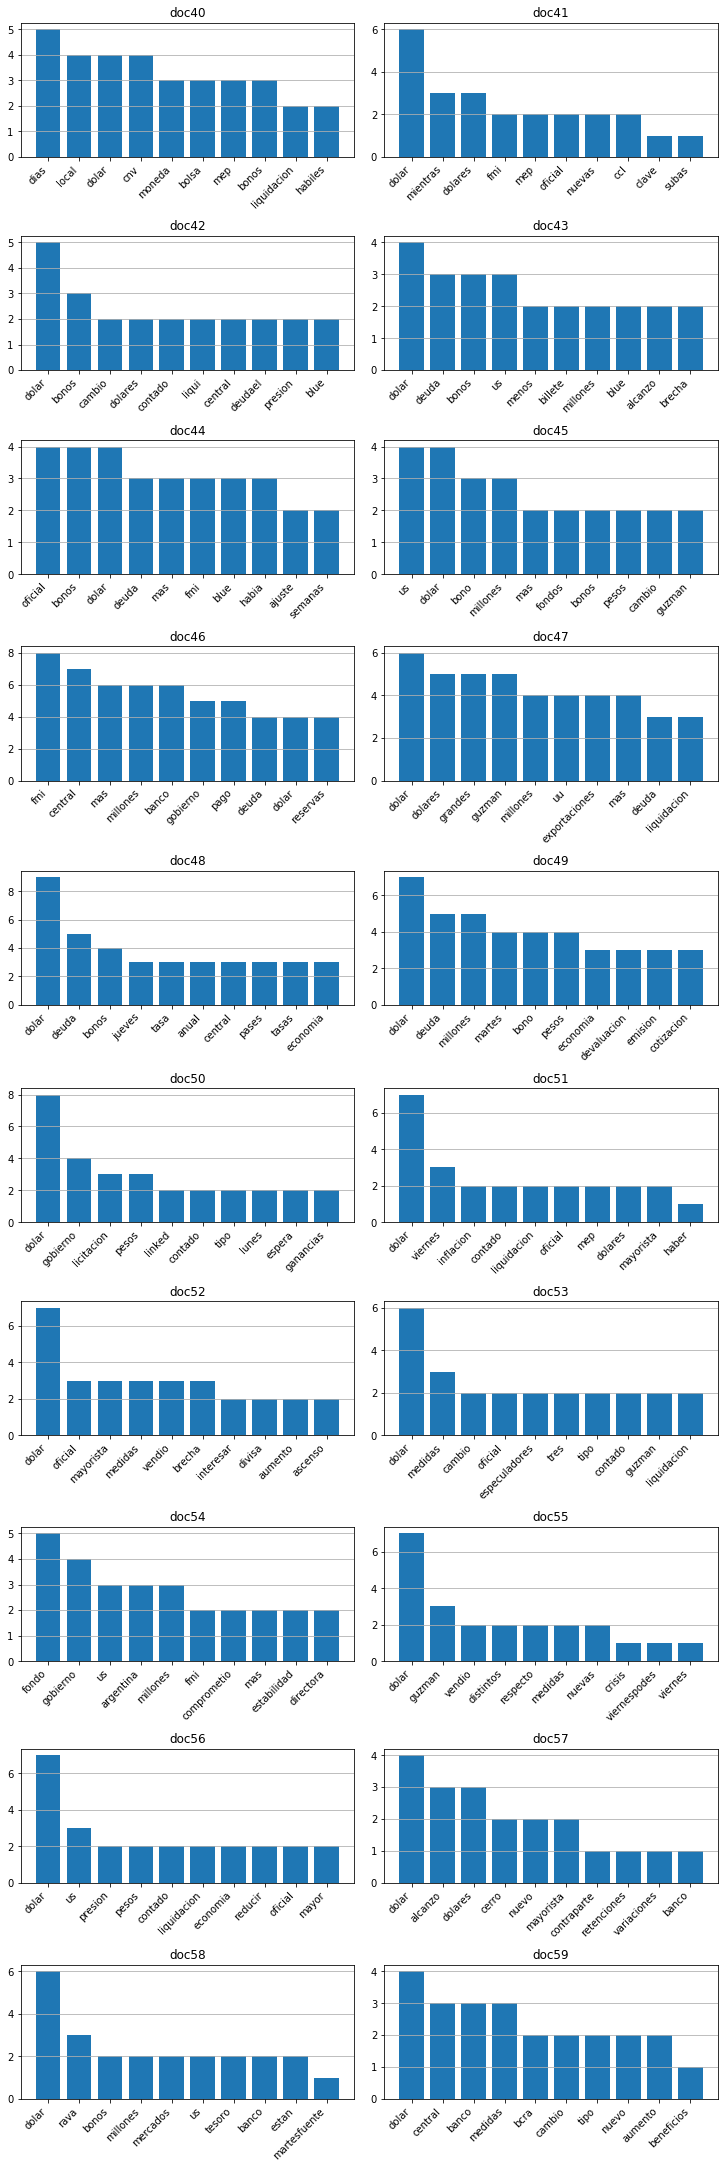

In [19]:
fig, axes = plt.subplots(nrows=10, ncols=2, constrained_layout=True, figsize=(10,30))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right')
    ax.set_title(list(top_words.keys())[index])

plt.xticks(rotation=45)
plt.show()

Check how many times the words are repeated amid the documents of the same topic

In [20]:
words = []
for docs, w_counts in top_words.items():
    for word in list(word for word, num in w_counts):
        words.append(word)        

In [21]:
for word_count in Counter(words).most_common()[:50]:
    print(word_count)

('dolar', 25)
('banco', 14)
('dolares', 13)
('bonos', 12)
('oficial', 12)
('guzman', 12)
('us', 12)
('mas', 11)
('central', 11)
('blue', 11)
('millones', 11)
('gobierno', 11)
('pesos', 10)
('contado', 10)
('mep', 9)
('medidas', 8)
('cambio', 8)
('puede', 8)
('mayorista', 7)
('deuda', 7)
('brecha', 7)
('liquidacion', 6)
('solidario', 6)
('dias', 5)
('liqui', 5)
('billete', 5)
('tipo', 5)
('economia', 5)
('grandes', 5)
('interesar', 5)
('vendio', 5)
('aumento', 5)
('tres', 4)
('mientras', 4)
('fmi', 4)
('ccl', 4)
('bancos', 4)
('semana', 4)
('estan', 4)
('argentina', 4)
('devaluacion', 4)
('bolsa', 3)
('dispuso', 3)
('vez', 3)
('marco', 3)
('jueves', 3)
('alcanzo', 3)
('reducir', 3)
('ajuste', 3)
('bono', 3)


The only words to be erased would be those who habe no contextual meaning.

In [22]:
more_stop_words = ['dia', 'fin','dias', 'dos', 'mas','ano', 'asi','puede', 'mes','incluso']

In [23]:
inflation.drop(more_stop_words, axis=1, inplace=True)

In [24]:
exchange.drop(more_stop_words, axis=1, inplace=True)

Tokens (manual) update

In [25]:
tokens_new = token_df.drop(more_stop_words, axis=1)

In [26]:
tokens_new.to_pickle('tokens/topic_tokens_izq_new.pkl')

### Visual Representation
#### Words Frequency

In [27]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import pickle

In [28]:
df = pickle.load(open('data/df_clean_izq.pkl','rb'))
df_inflation = df.loc[df.topics == 'inflation', 'body'].values
df_exchange = df.loc[df.topics == 'exchange', 'body'].values

In [29]:
stopwords_sp = stopwords.words('spanish')
stopwords_sp = stopwords_sp + more_stop_words

In [30]:
cloud = WordCloud(stopwords=stopwords_sp, background_color='white')

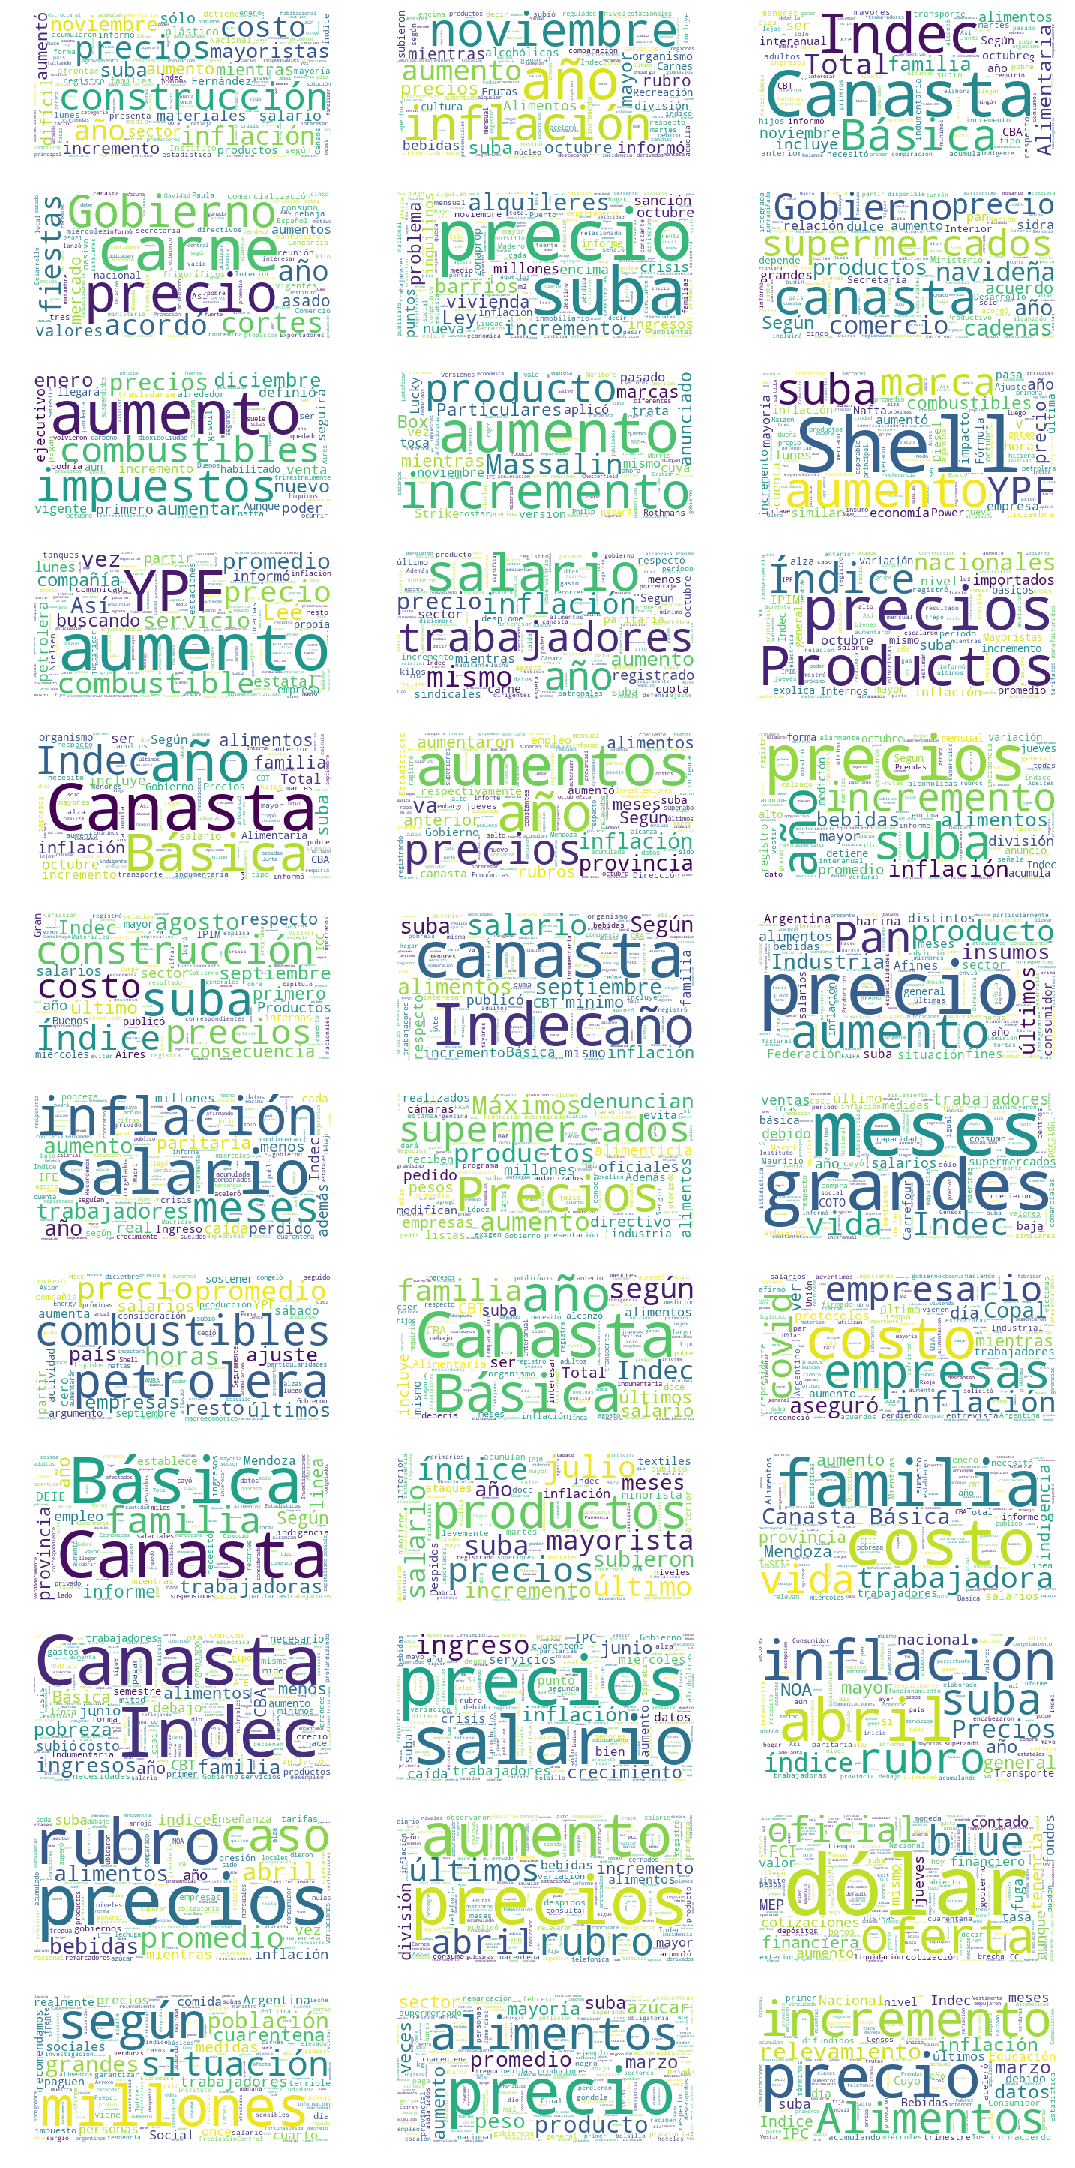

In [31]:
fig, axes = plt.subplots(nrows=12, ncols=3, constrained_layout=True, figsize=(15,30))

for index, (doc, ax) in enumerate(zip(df_inflation, axes.flatten())):
    cloud.generate(doc)
    ax.imshow(cloud)
    ax.axis('off')

plt.show()

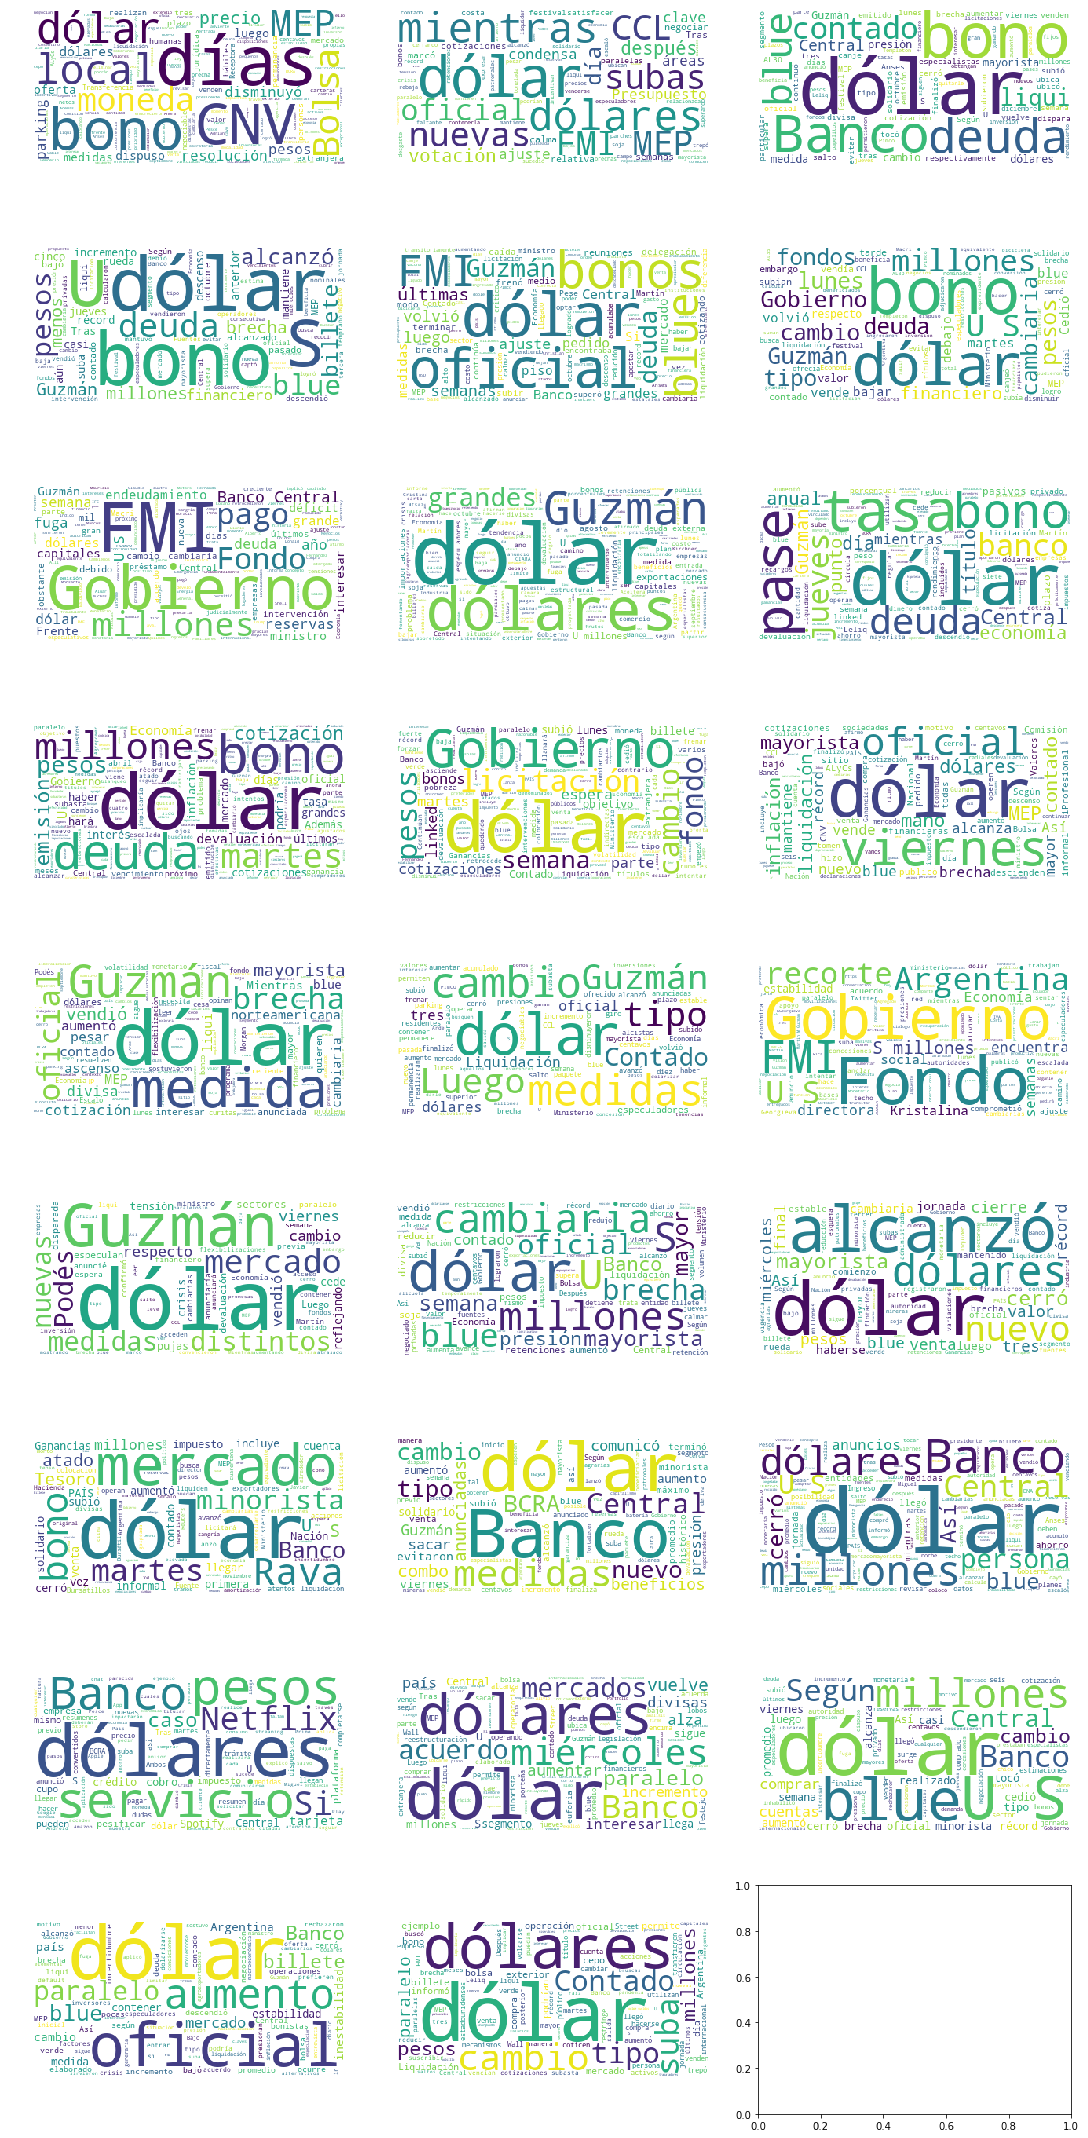

In [32]:
fig, axes = plt.subplots(nrows=9, ncols=3, constrained_layout=True, figsize=(15,30))

for index, (doc, ax) in enumerate(zip(df_exchange, axes.flatten())):
    cloud.generate(doc)
    ax.imshow(cloud)
    ax.axis('off')

plt.show()